
# **Importing libraries**

In [ ]:
import datetime as dt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 



In [ ]:
forest = pd.read_csv('fire_archive.csv')
forest.head()

latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0  -11.8070   142.0583       313.0   1.0    1.0  2019-08-01        56   
1  -11.7924   142.0850       319.3   1.0    1.0  2019-08-01        56   
2  -12.8398   132.8744       311.6   3.1    1.7  2019-08-01        57   
3  -14.4306   143.3035       310.1   1.1    1.1  2019-08-01        57   
4  -12.4953   131.4897       310.3   4.0    1.9  2019-08-01        57   

  satellite instrument  confidence  version  bright_t31   frp daynight  type  
0     Terra      MODIS          48      6.3       297.3   6.6        D     0  
1     Terra      MODIS          71      6.3       297.3  11.3        D     0  
2     Terra      MODIS          42      6.3       298.7  23.1        D     0  
3     Terra      MODIS          33      6.3       296.1   6.5        D     0  
4     Terra      MODIS          36      6.3       298.8  27.6        D     0


# **Data exploration**

In [ ]:
forest.shape

(36011, 15)

In [ ]:
forest.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [ ]:
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [ ]:
forest.describe()



latitude     longitude    brightness          scan         track  \
count  36011.000000  36011.000000  36011.000000  36011.000000  36011.000000   
mean     -19.100962    138.931446    328.750696      1.620905      1.215281   
std        7.265777      9.261400     18.992808      0.813764      0.247852   
min      -42.762800    114.104300    300.000000      1.000000      1.000000   
25%      -26.370250    131.072250    316.500000      1.100000      1.000000   
50%      -15.706500    136.738500    326.400000      1.300000      1.100000   
75%      -13.343600    147.477500    336.700000      1.900000      1.300000   
max      -10.072600    153.490400    504.400000      4.800000      2.000000   

           acq_time    confidence       version    bright_t31           frp  \
count  36011.000000  36011.000000  3.601100e+04  36011.000000  36011.000000   
mean     600.025798     67.551387  6.300000e+00    301.339138     51.132176   
std      548.369111     23.179946  3.728625e-12      9.724462     92.280112   
min        0.000000      0.000000  6.300000e+00    267.000000      0.000000   
25%      205.000000     52.000000  6.300000e+00    293.600000     13.800000   
50%      424.000000     70.000000  6.300000e+00    302.400000     25.800000   
75%      600.000000     86.000000  6.300000e+00    308.600000     52.800000   
max     2359.000000    100.000000  6.300000e+00    400.100000   3679.500000   

               type  
count  36011.000000  
mean       0.019439  
std        0.198326  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        3.000000

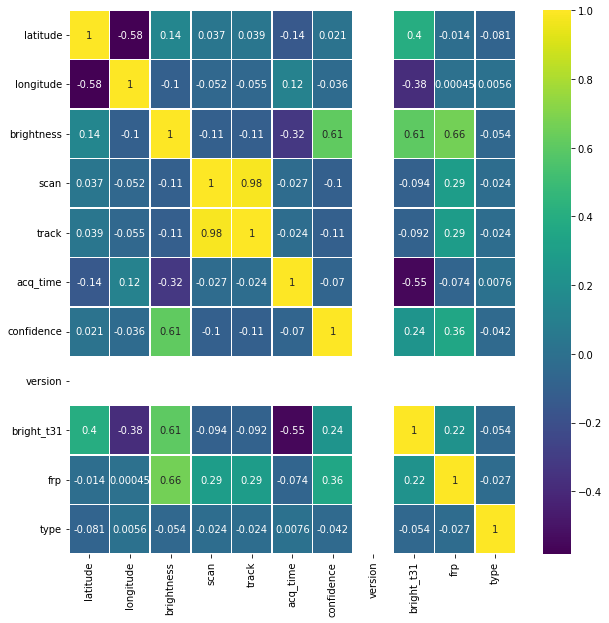

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(forest.corr(),annot=True,cmap='viridis',linewidths=.5)

# **Data cleaning**

In [ ]:
forest = forest.drop(['track'], axis = 1)

In [ ]:
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())
print()

The scan column
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.7     134
3.5     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: scan, dtype: int64

The aqc_time column
506     851
454     631
122     612
423     574
448     563
       ... 
246       1
1549      1
1724      1
1629      1
302       1
Name: acq_time, Length: 662, dtype: int64

The satellite column
Aqua     20541
Terra    15470
Name: satellite, dtype: int64

The instrument column
MODIS    36011
Name: instrument, dtype: int64

The version column
6.3    36011
Name: version, dtype: int64

The daynight column
D    28203
N     7808
Name: daynight, dtype: int64



In [ ]:
forest = forest.drop(['instrument', 'version'], axis = 1)
forest.head()

latitude  longitude  brightness  scan    acq_date  acq_time satellite  \
0  -11.8070   142.0583       313.0   1.0  2019-08-01        56     Terra   
1  -11.7924   142.0850       319.3   1.0  2019-08-01        56     Terra   
2  -12.8398   132.8744       311.6   3.1  2019-08-01        57     Terra   
3  -14.4306   143.3035       310.1   1.1  2019-08-01        57     Terra   
4  -12.4953   131.4897       310.3   4.0  2019-08-01        57     Terra   

   confidence  bright_t31   frp daynight  type  
0          48       297.3   6.6        D     0  
1          71       297.3  11.3        D     0  
2          42       298.7  23.1        D     0  
3          33       296.1   6.5        D     0  
4          36       298.8  27.6        D     0

In [ ]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)
forest.head()

latitude  longitude  brightness  scan    acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0   1.0  2019-08-01        56          1   
1  -11.7924   142.0850       319.3   1.0  2019-08-01        56          1   
2  -12.8398   132.8744       311.6   3.1  2019-08-01        57          1   
3  -14.4306   143.3035       310.1   1.1  2019-08-01        57          1   
4  -12.4953   131.4897       310.3   4.0  2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  type  
0          48       297.3   6.6         1     0  
1          71       297.3  11.3         1     0  
2          42       298.7  23.1         1     0  
3          33       296.1   6.5         1     0  
4          36       298.8  27.6         1     0

In [ ]:
forest['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

In [ ]:
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)
forest = forest.drop(['type'], axis = 1)
forest.head()

latitude  longitude  brightness  scan    acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0   1.0  2019-08-01        56          1   
1  -11.7924   142.0850       319.3   1.0  2019-08-01        56          1   
2  -12.8398   132.8744       311.6   3.1  2019-08-01        57          1   
3  -14.4306   143.3035       310.1   1.1  2019-08-01        57          1   
4  -12.4953   131.4897       310.3   4.0  2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  0  2  3  
0          48       297.3   6.6         1  1  0  0  
1          71       297.3  11.3         1  1  0  0  
2          42       298.7  23.1         1  1  0  0  
3          33       296.1   6.5         1  1  0  0  
4          36       298.8  27.6         1  1  0  0

In [ ]:
forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)
forest.head()

latitude  longitude  brightness  scan    acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0   1.0  2019-08-01        56          1   
1  -11.7924   142.0850       319.3   1.0  2019-08-01        56          1   
2  -12.8398   132.8744       311.6   3.1  2019-08-01        57          1   
3  -14.4306   143.3035       310.1   1.1  2019-08-01        57          1   
4  -12.4953   131.4897       310.3   4.0  2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  type_0  type_2  type_3 scan_binned  
0          48       297.3   6.6         1       1       0       0           1  
1          71       297.3  11.3         1       1       0       0           1  
2          42       298.7  23.1         1       1       0       0           4  
3          33       296.1   6.5         1       1       0       0           2  
4          36       298.8  27.6         1       1       0       0           4

In [ ]:
forest['acq_date'] = pd.to_datetime(forest['acq_date'])
forest = forest.drop(['scan'], axis = 1)
forest['year'] = forest['acq_date'].dt.year
forest.head()

latitude  longitude  brightness   acq_date  acq_time  satellite  \
0  -11.8070   142.0583       313.0 2019-08-01        56          1   
1  -11.7924   142.0850       319.3 2019-08-01        56          1   
2  -12.8398   132.8744       311.6 2019-08-01        57          1   
3  -14.4306   143.3035       310.1 2019-08-01        57          1   
4  -12.4953   131.4897       310.3 2019-08-01        57          1   

   confidence  bright_t31   frp  daynight  type_0  type_2  type_3 scan_binned  \
0          48       297.3   6.6         1       1       0       0           1   
1          71       297.3  11.3         1       1       0       0           1   
2          42       298.7  23.1         1       1       0       0           4   
3          33       296.1   6.5         1       1       0       0           2   
4          36       298.8  27.6         1       1       0       0           4   

   year  
0  2019  
1  2019  
2  2019  
3  2019  
4  2019

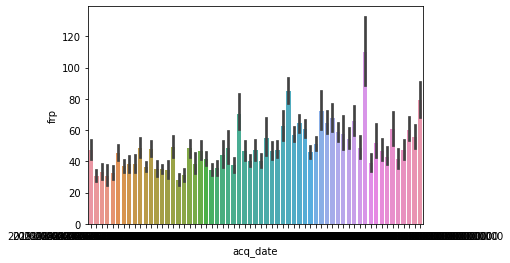

In [ ]:
sns.barplot(x='acq_date',y='frp',data=forest)

In [ ]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day
forest.shape

(36011, 17)

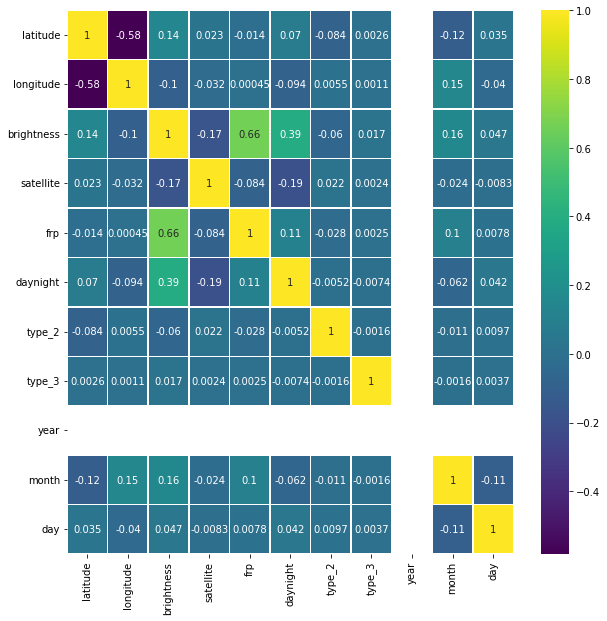

In [ ]:
y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [ ]:
fin.head()

latitude  longitude  brightness  satellite   frp  daynight  type_2  type_3  \
0  -11.8070   142.0583       313.0          1   6.6         1       0       0   
1  -11.7924   142.0850       319.3          1  11.3         1       0       0   
2  -12.8398   132.8744       311.6          1  23.1         1       0       0   
3  -14.4306   143.3035       310.1          1   6.5         1       0       0   
4  -12.4953   131.4897       310.3          1  27.6         1       0       0   

  scan_binned  year  month  day  
0           1  2019      8    1  
1           1  2019      8    1  
2           4  2019      8    1  
3           2  2019      8    1  
4           4  2019      8    1

In [ ]:
fin.describe()

latitude     longitude    brightness     satellite           frp  \
count  36011.000000  36011.000000  36011.000000  36011.000000  36011.000000   
mean     -19.100962    138.931446    328.750696      0.429591     51.132176   
std        7.265777      9.261400     18.992808      0.495025     92.280112   
min      -42.762800    114.104300    300.000000      0.000000      0.000000   
25%      -26.370250    131.072250    316.500000      0.000000     13.800000   
50%      -15.706500    136.738500    326.400000      0.000000     25.800000   
75%      -13.343600    147.477500    336.700000      1.000000     52.800000   
max      -10.072600    153.490400    504.400000      1.000000   3679.500000   

           daynight        type_2        type_3     year         month  \
count  36011.000000  36011.000000  36011.000000  36011.0  36011.000000   
mean       0.783177      0.009303      0.000278   2019.0      8.548638   
std        0.412087      0.096002      0.016662      0.0      0.497636   
min        0.000000      0.000000      0.000000   2019.0      8.000000   
25%        1.000000      0.000000      0.000000   2019.0      8.000000   
50%        1.000000      0.000000      0.000000   2019.0      9.000000   
75%        1.000000      0.000000      0.000000   2019.0      9.000000   
max        1.000000      1.000000      1.000000   2019.0      9.000000   

               day  
count  36011.00000  
mean      14.36089  
std        8.30903  
min        1.00000  
25%        8.00000  
50%       13.00000  
75%       21.00000  
max       31.00000

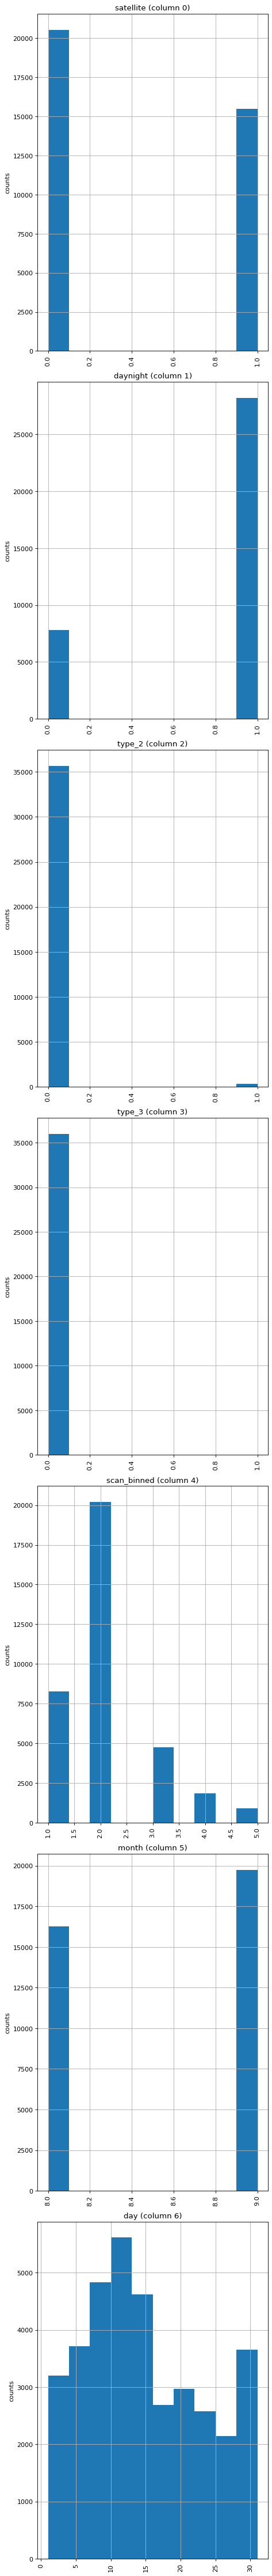

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(fin, 10, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  after removing the cwd from sys.path.


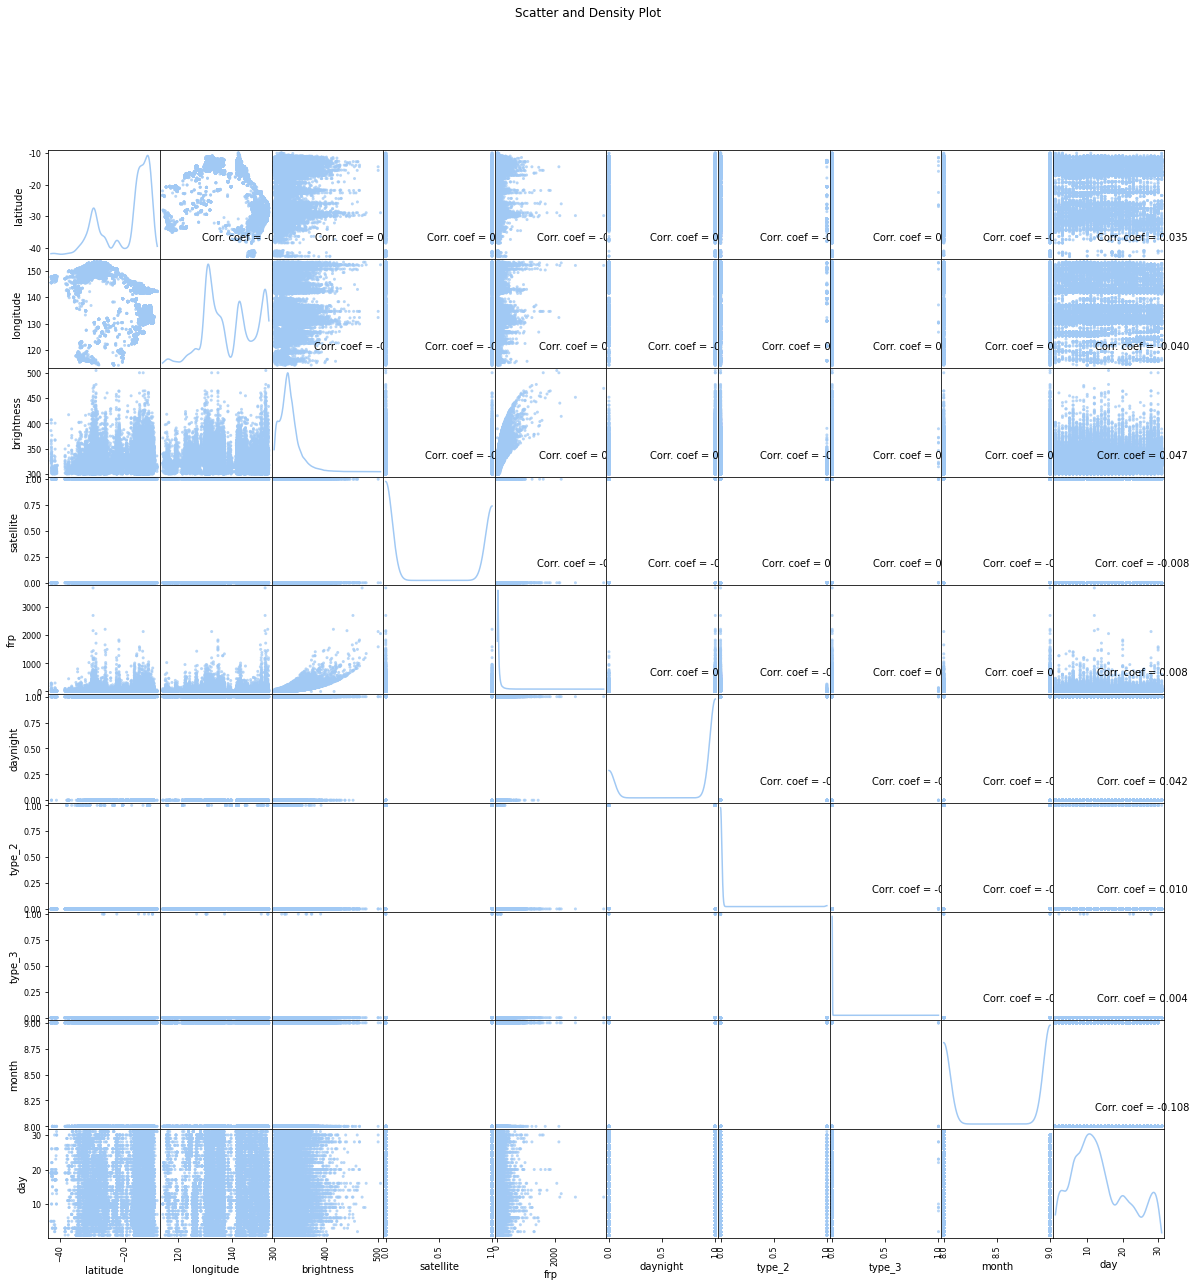

In [ ]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(fin, 20, 10)

# **Splitting the clean data into training and testing dataset**

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :500],
                                                y,
                                                test_size=0.2)

# Model building

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
tree_model = DecisionTreeRegressor(max_depth=10)
tree_model.fit(Xtrain, ytrain)
y_pred_tree = tree_model.predict(Xtest)

tree_model_accuracy = round(tree_model.score(Xtrain, ytrain)*100,2)
print(round(tree_model_accuracy, 2), '%')


68.69 %


In [ ]:
tree_model_accuracy1 = round(tree_model.score(Xtest, ytest)*100,2)
print(round(tree_model_accuracy1, 2), '%')

56.53 %


### Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Train using a radial basis function
svr_model = SVR(kernel='rbf', gamma=0.1)
svr_model.fit(Xtrain, ytrain)
y_pred_svr = svr_model.predict(Xtest)

svr_model_accuracy = round(svr_model.score(Xtrain, ytrain)*100,2)
print(round(svr_model_accuracy, 2), '%')

23.25 %


In [ ]:
svr_model_accuracy1 = round(svr_model.score(Xtest, ytest)*100,2)
print(round(svr_model_accuracy1, 2), '%')

16.63 %


### Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_model = RandomForestRegressor(n_estimators=300,
                                     random_state = 42,
                                     n_jobs = -1)
#Fit
random_model.fit(Xtrain, ytrain)
y_pred_random = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.39 %


In [ ]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

64.12 %


# Model Selection and Tuning


According to the above models, we select Random Forest Regressor.
The accuracy is not so great, plus the model is overfitting. So we use RandomCV

In [ ]:
random_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
#Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
rf_random_model = RandomizedSearchCV(estimator = random_model,
                                     param_distributions = random_grid, 
                                     n_iter = 50, 
                                     cv = 3, 
                                     verbose=2,
                                     random_state=42)
# Fit the random search model
rf_random_model.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  32.3s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  31.2s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  49.5s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  46.9s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  37.5s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  37.6s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  16.9s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                                   random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [ ]:
rf_random_model.best_params_

{'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 457}

In [ ]:
random_new = RandomForestRegressor(n_estimators = 457, 
                                   min_samples_split = 3,
                                   min_samples_leaf = 1, 
                                   max_features = 'sqrt',
                                   max_depth = 35,
                                   bootstrap = True)
#Fit
random_new.fit(Xtrain, ytrain)
y_pred_new = random_new.predict(Xtest)
#Checking the accuracy
random_new_accuracy = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_new_accuracy, 2), '%')

94.05 %


In [ ]:
random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

67.72 %


In [ ]:
import pickle 
saved_model = pickle.dump(random_new, open('ForestModel.pickle','wb'))
